Predicting reaction performance in C–N cross-coupling using machine learning
Experimental data obtained from Ahneman et al publication in Science DOI: 10.1126/science.aar5169
                    

In [78]:
# Import relevant libraries

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sn
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
#import utils
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [11]:
# open a file containing descriptors and yield
data = pd.read_csv(r"C:\Users\Gashaw\Documents\Descriptor_and_yield_table.csv")
X_data = data.drop(['yield'], axis =1) # the 120 descriptors and their values
y_data = data['yield'] # Yield of the 3560 rows is stored in the y_data variable

In [37]:
data

,additive_*C3_NMR_shift,additive_*C3_electrostatic_charge,additive_*C4_NMR_shift,additive_*C4_electrostatic_charge,additive_*C5_NMR_shift,additive_*C5_electrostatic_charge,additive_*N1_electrostatic_charge,additive_*O1_electrostatic_charge,additive_E_HOMO,additive_E_LUMO,...,ligand_V6_frequency,ligand_V6_intensity,ligand_V7_frequency,ligand_V7_intensity,ligand_V8_frequency,ligand_V8_intensity,ligand_V9_frequency,ligand_V9_intensity,ligand_dipole_moment,yield
0,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.210,1.212924,10.657812
1,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.210,1.212924,14.747896
2,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.210,1.212924,18.278686
3,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.210,1.212924,2.475058
4,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.210,1.212924,6.119058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,152.98,0.429,98.09,-0.589,159.31,0.387,-0.350,-0.068,-0.2337,-0.0696,...,1631.618,37.445,3025.675,16.220,1054.500,1.432,3041.406,35.621,3.735286,57.426670
3956,152.98,0.429,98.09,-0.589,159.31,0.387,-0.350,-0.068,-0.2337,-0.0696,...,1631.618,37.445,3025.675,16.220,1054.500,1.432,3041.406,35.621,3.735286,86.233157
3957,152.98,0.429,98.09,-0.589,159.31,0.387,-0.350,-0.068,-0.2337,-0.0696,...,1631.618,37.445,3025.675,16.220,1054.500,1.432,3041.406,35.621,3.735286,1.440081
3958,152.98,0.429,98.09,-0.589,159.31,0.387,-0.350,-0.068,-0.2337,-0.0696,...,1631.618,37.445,3025.675,16.220,1054.500,1.432,3041.406,35.621,3.735286,43.538365


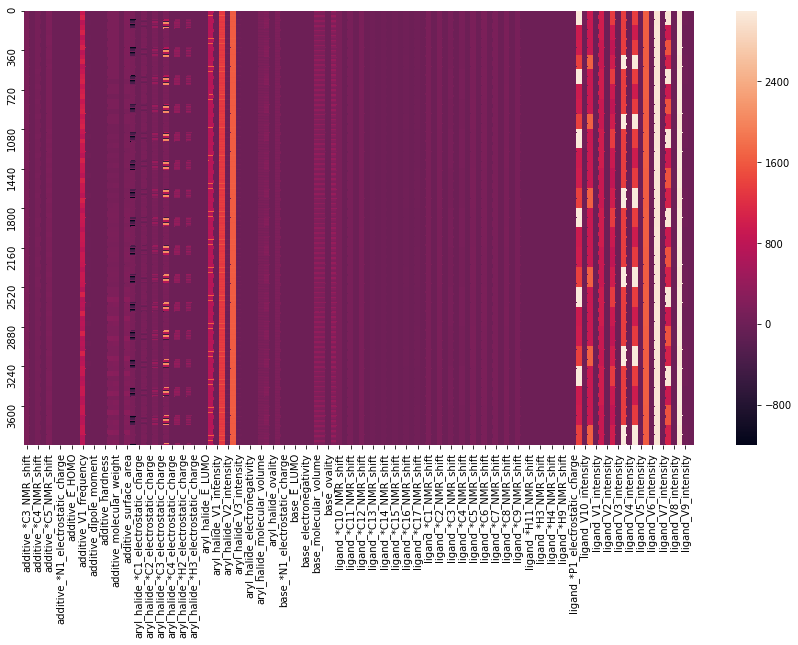

In [15]:
# Set the width and height of the figure
plt.figure(figsize=(15,8))
# Generate heatmap for the seven columns or descriptors
sn.heatmap(data=X_data,yticklabels=360)

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X_data, y_data,test_size = 0.3, random_state=1)
rf = RandomForestRegressor(n_estimators=500, random_state=42)

In [19]:
# Data preprocessing
pipe = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('preprocessor', SimpleImputer()),
        ('model', rf)])

In [20]:
# Model Training and prediction
pipe.fit(X_train,y_train) # training using 70% of the data
predicted_yield = pipe.predict(X_valid) # predicting yield for 30% of the data

In [21]:
# Model accuracy using root mean square error 
rmse = np.sqrt(mean_squared_error(y_valid, predicted_yield )) 
print('rmse:', rmse)

rmse: 7.587503796752248


In [22]:
# R^2 (coefficient of determination) regression score function: 
R2 =r2_score(y_valid, predicted_yield )
print('R^2:', R2)

R^2: 0.9254611516736759


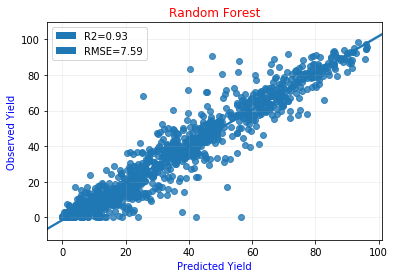

In [23]:
sn.regplot(x=predicted_yield , y=y_valid)
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.title("Random Forest", color='red')
plt.grid(alpha=0.2)
R2 = mpatches.Patch(label="R2={:04.2f}".format(R2))
rmse = mpatches.Patch(label="RMSE={:04.2f}".format(rmse))
plt.legend(handles=[R2, rmse])

In [24]:
# Feature importance Random forest
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(pipe, random_state=1).fit(X_valid, y_valid)
eli5.show_weights(perm, feature_names = X_valid.columns.tolist())

Using TensorFlow backend.


Weight,Feature
0.7577 ± 0.0931,aryl_halide_*C3_NMR_shift
0.2733 ± 0.0268,aryl_halide_*H2_electrostatic_charge
0.2544 ± 0.0345,additive_*C3_NMR_shift
0.0218 ± 0.0067,additive_*C4_NMR_shift
0.0174 ± 0.0026,aryl_halide_V2_frequency
0.0159 ± 0.0028,additive_*O1_electrostatic_charge
0.0156 ± 0.0043,additive_*C5_electrostatic_charge
0.0125 ± 0.0034,base_*N1_electrostatic_charge
0.0125 ± 0.0024,base_electronegativity
0.0119 ± 0.0027,additive_E_LUMO


In [43]:
# XGBoost the most widely used ML model in kaggle competition
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500, random_state=42)


In [44]:
pipe2 = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('preprocessor', SimpleImputer()),
        ('model', xgb)])

In [45]:
# Model Training and prediction
pipe2.fit(X_train,y_train) # training using 70% of the data
predicted_yield2 = pipe2.predict(X_valid) # predicting yield for 30% of the data

In [46]:
# Model accuracy using root mean square error 
rmse2 = np.sqrt(mean_squared_error(y_valid, predicted_yield2))  
print('rmse:', rmse2)

rmse: 6.693496111327877


In [47]:
# R^2 (coefficient of determination) regression score function: 
R_2 =r2_score(y_valid, predicted_yield2)
print('R^2:', R_2)

R^2: 0.9419916027336953


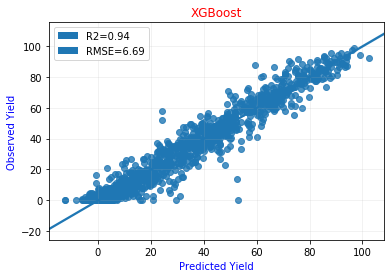

In [48]:
sn.regplot(x=predicted_yield2, y=y_valid)
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.title("XGBoost", color='red')
plt.grid(alpha=0.2)
R_2 = mpatches.Patch(label="R2={:04.2f}".format(R_2))
rmse2 = mpatches.Patch(label="RMSE={:04.2f}".format(rmse2))
plt.legend(handles=[R_2, rmse2])

In [86]:
# Feature importance Random forest
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(pipe2, random_state=1).fit(X_valid, y_valid)
eli5.show_weights(perm, feature_names = X_valid.columns.tolist())

Weight,Feature
0.5638 ± 0.0645,aryl_halide_*C3_NMR_shift
0.2235 ± 0.0208,ligand_*C11_NMR_shift
0.1767 ± 0.0181,additive_*C3_NMR_shift
0.1530 ± 0.0156,base_*N1_electrostatic_charge
0.1453 ± 0.0102,aryl_halide_*H2_electrostatic_charge
0.1175 ± 0.0250,base_E_HOMO
0.0452 ± 0.0086,additive_*C4_NMR_shift
0.0419 ± 0.0048,ligand_*C10_NMR_shift
0.0346 ± 0.0075,aryl_halide_*C1_NMR_shift
0.0320 ± 0.0059,aryl_halide_V2_frequency
